<img src='https://i.ytimg.com/vi/js1CtxSY38I/maxresdefault.jpg'>

# Attention Mechanism

**Seq2seq 모델은 기존의 RNN 모델과 같이 고정된 길이의 벡터를 입력으로 받아 고정된 벡터를 출력하는 구조를 가지고 있음.** 그러나 이 구조는 고정된 길이의 벡터 압축으로 시퀀스의 길이가 길어질수록 정보의 손실이 발생할 수 있음.

이러한 한계를 보완하기 위해 Attention mechanism이 도입되었음. **Attention mechansim은 입력 문장의 모든 단어를 동일한 가중치로 취급하지 않고, 출력 문장에서 특정 위치에 대응하는 입력 단어들에 더 많은 가중치를 부여함.**

# Attention Function

Attention Function은 **입력 시퀀스의 각 단어들의 대한 가중치를 계산하는 함수.** 이 함수는 각 단어의 중요도를 측정하여 출력 결과에 반영함.

Attention Function은 크게 세 가지 요소로 구성됨. Query, Key, Value입니다.

**Query는 현재 출력 단어를 나타내는 벡터(t 시점의 디코더 셀에서의 은닉 상태)이고, Key와 Value는 입력 시퀀스의 각 단어에 대응하는 벡터(모든 시점의 인코더 셀의 은닉 상태들)**

<center>
<img src='https://velog.velcdn.com/images%2Fsjinu%2Fpost%2F0c796b58-065e-4b45-bbd7-712d3fc1d05b%2Fimage.png'>
</center>

Attention(Q,K,V) = Attention Value

어텐션 함수는 주어진 '쿼리(Query)'에 대해 '키(Key)'의 유사도를 각각 구함. 그리고,  이 유사도는 키(key)와 매핑되어 있는 각각의 값(Value)에 반영해줌. 유사도가 반영된 값(Value)을 모두 더해서 리턴하고, 어텐션 값(Attention Value)를 반환.

1) Key vector를 생성.

각 단어(토큰)을 벡터화함.
- key
    - Encoder hidden state
    - Encoder가 각 단어(토큰)마다 이해한 내

2) Query와 key를 dot product

디코더가 지금까지 문장을 정리애온 내용인, query를 가져와서 Key와 dot product하여 유사도를 구함.

- query
    - Decoder hidden state
    - 디코더가 지금까지 문장을 생성하면서 정리해온 내용

    - 왜 Query라고 부를까?
        - 검색할 때, Query를 이용해서 원하는 결과를 찾아냄.
        - 디코더도 쿼리를 이용해서 중요한 key들을 찾음.
    - 중요한 key를 찾기 위한 도구
        - query와 key를 dot product 수행 -> 유사도 scroe
        - 두 벡터가 사이즈가 안 맞기 때문에 벡터를 transpose 해서 dot product 진행
            - [1, vec_size][vec_size,1]
        - 계산하면 각 key별로 유사도
        - dot product가 왜 유사도일까?
            - dot product(내적)한다는 것은 한 벡터를 다른 벡터에 정사영한 것의 길이를 곱하는 것.
            - query 벡터에 key를 정사영해서 둘의 길이를 곱하는 것.
            - 비슷한 방향과 비슷한 크기를 가진 벡터는 내적갑싱 커지기 때문에 유사도로 사용하는 것이 타당함.
3) 구한 score에 softmax를 취해서 0~1 사이의 값으로 만듦.

4) 그 다음 Key Vector와 곱해서 value를 만듦.

- value
    - query와 key를 이용해서 score를 구한 후, softmax를 취한 값에 다시 key vector를 곱한 값.
    - aliment vector : 대응 관계를 나타내는 정보 벡터
    - key별로 하나씩 있어서 이름이 value
    - Score값이 클수록 key vector의 원래 형태가 더 많이 남아 있음.

5) Value들을 모두 더해서 context vector를 만듦.

- context vector
    - Value값들을 모두 더하기.

6) Value vector를 디코더에 입력

- 디코더가 이전스텝까지 정리한 벡터들과 concat한다.
    - 어텐션을 이용하는 방법은 많으나, 여기서는 concat으로 하자.

**어텐션 메커니즘은 인코더가 단어(토큰) 단위로 정리한 벡터 중에서 디코더가 중요한 벡터를 골라서 쓰는 방법**

**간단한 예제**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers

In [ ]:
batch_size = 1000
input_size = 32
attention_index = 7

In [ ]:
def make_data(batch_size, input_size, attention_index):
    # x -> 랜덤값
    x = np.random.standard_normal((batch_size, input_size))
    # y -> 0 또는 1값
    y = np.random.randint(low=0, high=2, size=(batch_size, 1))
    # x에서 attention_idx 자리는 y값과 동일하게
    x[:, attention_index] = y[:, 0]

    return x, y


In [ ]:
x = np.random.standard_normal((5, 7))

In [ ]:
x = np.random.randint(low=0, high=10, size=(5, 3 ))
y = np.random.randint(low=0, high=10, size=(5, 3))

In [ ]:
x = tf.constant(x)

In [ ]:
tf.matmul(x, x, transpose_b = True)

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 94,  27,  97,  76,  58],
       [ 27,  13,  22,  20,  20],
       [ 97,  22, 122,  90,  63],
       [ 76,  20,  90,  68,  50],
       [ 58,  20,  63,  50,  41]])>

In [ ]:
x

<tf.Tensor: shape=(5, 3), dtype=int64, numpy=
array([[3, 6, 7],
       [2, 0, 3],
       [5, 9, 4],
       [4, 6, 4],
       [4, 3, 4]])>

In [ ]:
tf.transpose(x)

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[3, 2, 5, 4, 4],
       [6, 0, 9, 6, 3],
       [7, 3, 4, 4, 4]])>

In [ ]:
import sklearn
sklearn.metrics.pairwise.cosine_similarity(x, x)

array([[1.        , 0.77237492, 0.90579077, 0.95059431, 0.93426943],
       [0.77237492, 1.        , 0.55242216, 0.67267279, 0.86629616],
       [0.90579077, 0.55242216, 1.        , 0.98811647, 0.89077641],
       [0.95059431, 0.67267279, 0.98811647, 1.        , 0.94694252],
       [0.93426943, 0.86629616, 0.89077641, 0.94694252, 1.        ]])

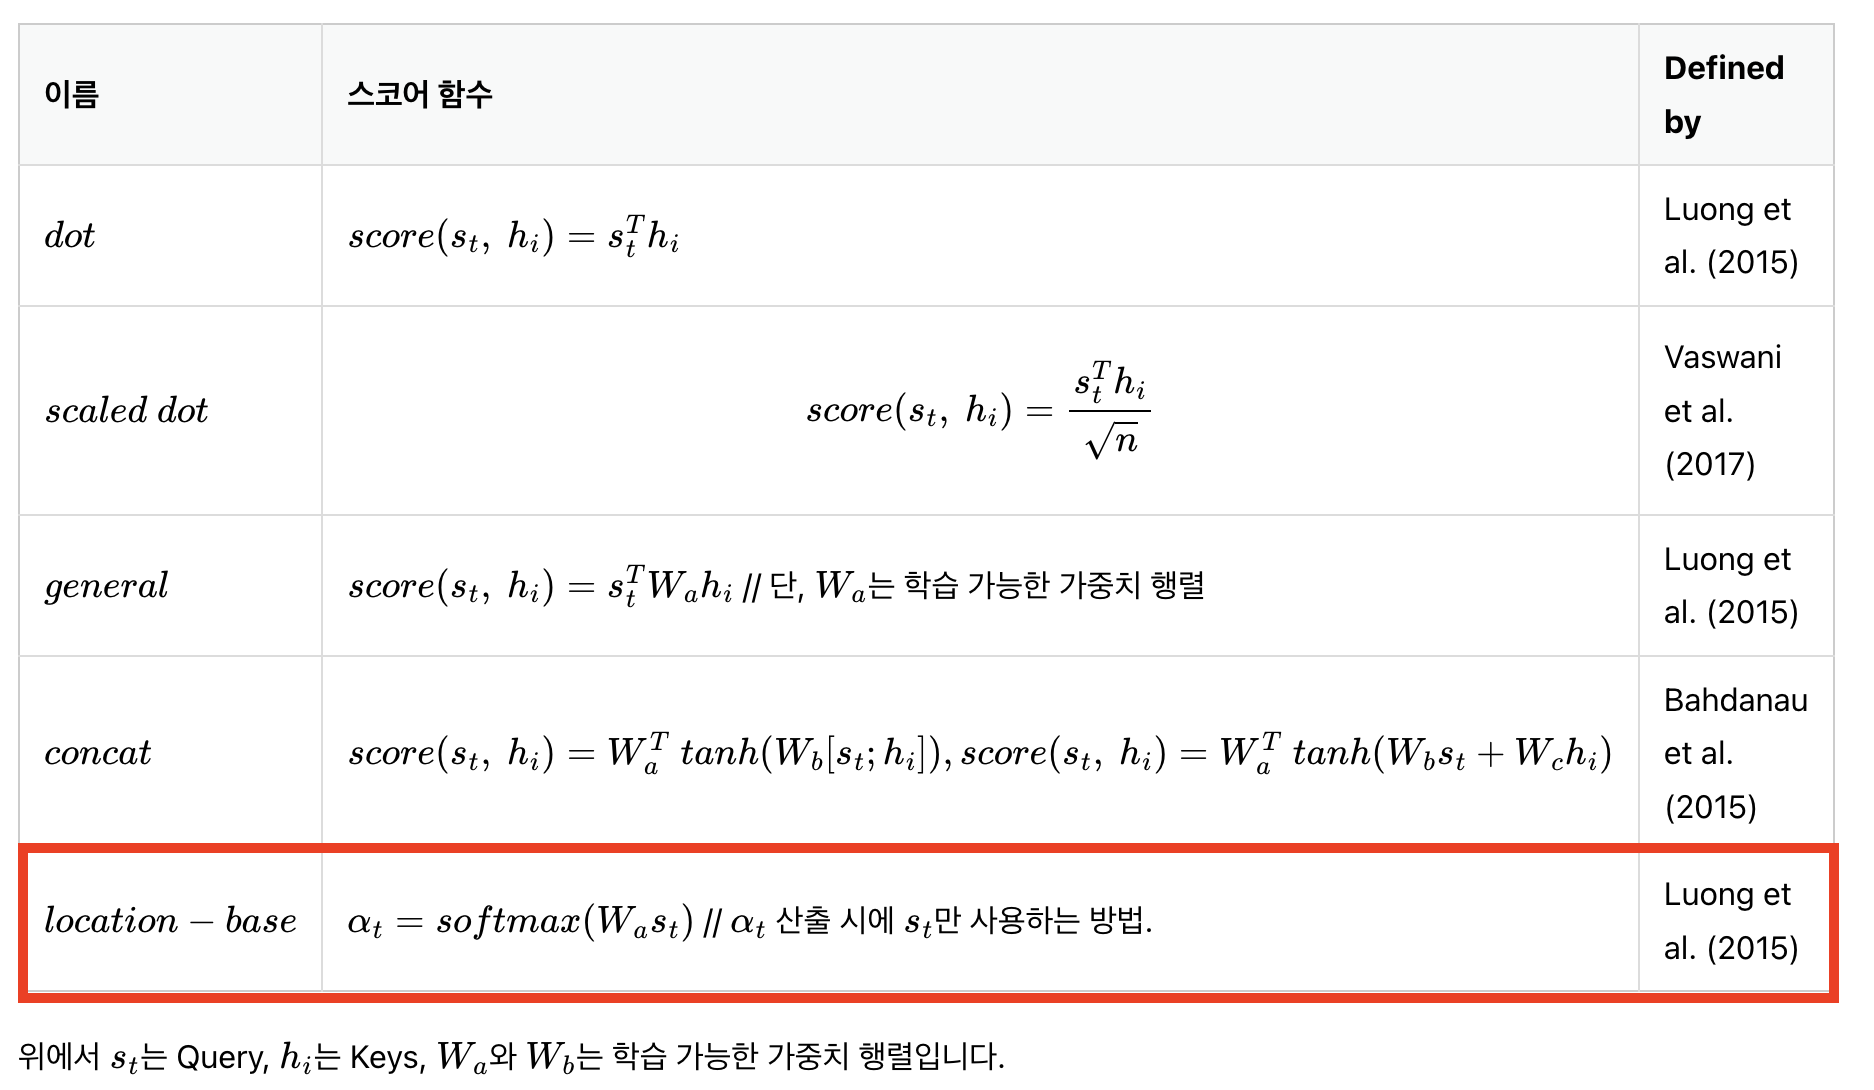

이번 실습에서는 여러가지 Attention 함수들 중에 location-base 함수를 이용하여 계산해보겠습니다.

In [ ]:
# 예시
x = tf.constant([[1, 2, 3]], dtype = tf.float32)
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [ ]:
att = layers.Dense(3, activation = 'softmax', name = 'attention_layer')(x)

layers.Multiply()([x, att])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.01899917, 0.01716363, 2.9172573 ]], dtype=float32)>

In [ ]:
input = tf.keras.Input(shape=(input_size, ))

# Attention Layer
attention_score = layers.Dense(input_size, activation = 'softmax', name = 'attention_layer')(input)
mul = layers.Multiply()([input, attention_score])

# Classifier
x = layers.Dense(64, activation = 'relu')(mul)
output = layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
model = models.Model(input, output)

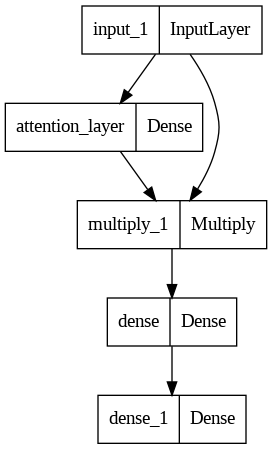

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 attention_layer (Dense)     (None, 32)                   1056      ['input_1[0][0]']             
                                                                                                  
 multiply_1 (Multiply)       (None, 32)                   0         ['input_1[0][0]',             
                                                                     'attention_layer[0][0]']     
                                                                                                  
 dense (Dense)               (None, 64)                   2112      ['multiply_1[0][0]']      

In [ ]:
x, y = make_data(batch_size, input_size, attention_index)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.fit(x, y, epochs = 100, batch_size = 64,  validation_split= 0.2)

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.6932 - acc: 0.5150 - val_loss: 0.6914 - val_acc: 0.5450
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6903 - acc: 0.5725 - val_loss: 0.6901 - val_acc: 0.5600
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6881 - acc: 0.5537 - val_loss: 0.6888 - val_acc: 0.5150
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6857 - acc: 0.5638 - val_loss: 0.6872 - val_acc: 0.5150
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6831 - acc: 0.5813 - val_loss: 0.6853 - val_acc: 0.5550
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6801 - acc: 0.6025 - val_loss: 0.6828 - val_acc: 0.5450
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6760 - acc: 0.6463 - val_loss: 0.6795 - val_acc: 0.5750
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6712 - 

In [ ]:
test_x, test_y = make_data(batch_size, input_size, 7)

result = model.evaluate(test_x, test_y, batch_size = 64)
print(result[0])
print(result[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.5442 - acc: 0.8740
0.5442261695861816
0.8740000128746033


In [ ]:
att_model = models.Model(input, attention_score)
att_model

In [ ]:
test_att_score = att_model(test_x)
test_att_score

<tf.Tensor: shape=(1000, 32), dtype=float32, numpy=
array([[0.00281727, 0.00219111, 0.00186656, ..., 0.0010887 , 0.01314405,
        0.00542278],
       [0.01491072, 0.01627186, 0.0066385 , ..., 0.00926945, 0.06405298,
        0.0132933 ],
       [0.00904005, 0.01897483, 0.0027201 , ..., 0.00457719, 0.02412566,
        0.01764302],
       ...,
       [0.0582257 , 0.00177449, 0.0288556 , ..., 0.00114003, 0.02233521,
        0.19898711],
       [0.00395904, 0.04833226, 0.00118825, ..., 0.00395893, 0.04390047,
        0.00308939],
       [0.00545239, 0.02112036, 0.01569101, ..., 0.00909818, 0.00386897,
        0.00900541]], dtype=float32)>

In [ ]:
np.mean(test_att_score, axis=0)

array([0.01786072, 0.0360001 , 0.01489197, 0.01320858, 0.02534138,
       0.01734884, 0.01129061, 0.20185529, 0.03800504, 0.03386522,
       0.0331624 , 0.01508882, 0.03105738, 0.02250266, 0.03965145,
       0.0216182 , 0.03523292, 0.00974304, 0.02644285, 0.02489744,
       0.03535983, 0.03125418, 0.01006033, 0.0211241 , 0.02781853,
       0.02790288, 0.0227049 , 0.03601186, 0.00863666, 0.03543837,
       0.02591814, 0.04870541], dtype=float32)

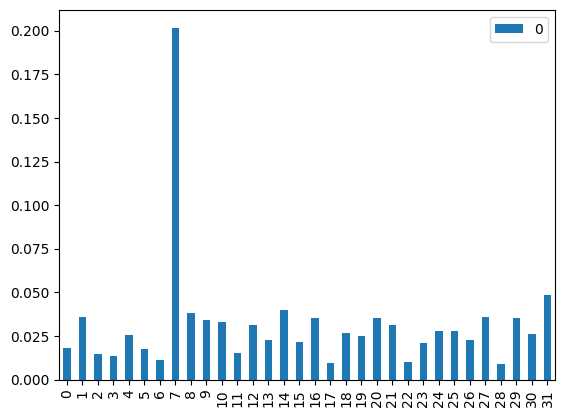

In [ ]:
pd.DataFrame(np.mean(test_att_score, axis=0)).plot(kind='bar')
plt.show()

# 근본적인 이해

이번 시간에는 **어텐션(Attention)의 근본적인 이해**를 해보도록 하겠습니다.  
어텐션은 단어(**It**)와 문장(**The** **animal** **didn't** **cross** **the** **street** **because** **it was too tired**) 내의 단어 각각과의  
닮은 정도를 나타내는 것입니다.  
![Imgur](https://i.imgur.com/x1GYPP0.png)  
  출처 : http://jalammar.github.io/illustrated-transformer/
  
  그림을 보면서 감을 잡아보도록 하겠습니다.  
**The animal didn't cross the street because it was too tired (그 동물은 길을 건너지 않았다. 왜냐하면 It(그 동물)은 너무 지쳤기 때문이다.)**  
그림에서는 실선의 진한 정도로 It과 앞 문장안의 단어들간의 관계를 표현하고 있습니다.  
**It(동물)**은 사실 **앞 문장**에서 **The animal**이기 때문에, **The animal**과의 관계가 가장 진한 실선으로 크게 나타납니다. 그렇다고 해서 다른 단어들간의 관계 또한 아예 없는 것도 아닙니다. 문장 속에서 단어를, 다른 문장 내부의 단어들과의 관계의 정도를 나타내는 방식을 어텐션이라고 합니다.


같은 문장과 같은 문장의 어텐션을 **Self Attention**이라고 합니다.  
**트랜스포머나, 버트 모형**에서는 셀프 어텐션을 사용해서 **단어와 문장간의 관계**를 즉, **닮은 정도**를 딥-러닝을 통해 학습하게 됩니다.


버트나 트랜스포머를 직접 구현하면서 배우는 어텐션은 처음에 구현하기에 난도가 높은 편이므로, 간단하게 word2vec을 약간 개선한 glove를 활용하여 직접 어텐션을 구현해보고, 그림으로 나타내보도록 하겠습니다.

분석에 필요한 모듈을 임포트합니다.

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import gensim
import os, requests, shutil

import re

영어 단어 하나 하나를 임베딩 한 glove를 로드합니다.

In [ ]:
glove_dir = './glove'
glove_100k_50d = 'glove.first-100k.6B.50d.txt'
glove_100k_50d_path = os.path.join(glove_dir, glove_100k_50d)

data_cache = './data/cache'
glove_full_tar = 'glove.6B.zip'
glove_full_50d = 'glove.6B.50d.txt'


download_url= 'http://redcatlabs.com/downloads/deep-learning-workshop/notebooks/data/RNN/'+glove_100k_50d
original_url = 'http://nlp.stanford.edu/data/'+glove_full_tar

if not os.path.isfile( glove_100k_50d_path ):
    if not os.path.exists(glove_dir):
        os.makedirs(glove_dir)


    response = requests.get(download_url, stream=True)
    if response.status_code == requests.codes.ok:
        print("Downloading 42Mb pre-prepared GloVE file from RedCatLabs")
        with open(glove_100k_50d_path, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
    else:

        if not os.path.exists(data_cache):
            os.makedirs(data_cache)

        if not os.path.isfile( os.path.join(data_cache, glove_full_50d) ):
            zipfilepath = os.path.join(data_cache, glove_full_tar)
            if not os.path.isfile( zipfilepath ):
                print("Downloading 860Mb GloVE file from Stanford")
                response = requests.get(download_url, stream=True)
                with open(zipfilepath, 'wb') as out_file:
                    shutil.copyfileobj(response.raw, out_file)
            if os.path.isfile(zipfilepath):
                print("Unpacking 50d GloVE file from zip")
                import zipfile
                zipfile.ZipFile(zipfilepath, 'r').extract(glove_full_50d, data_cache)

        with open(os.path.join(data_cache, glove_full_50d), 'rt') as in_file:
            with open(glove_100k_50d_path, 'wt') as out_file:
                print("Reducing 50d GloVE file to first 100k words")
                for i, l in enumerate(in_file.readlines()):
                    if i>=100000: break
                    out_file.write(l)


print("GloVE available locally")

def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

word_embedding = loadGloveModel(glove_100k_50d_path)

GloVE available locally
Loading Glove Model
Done. 100000  words loaded!


임베딩 벡터들이 잘 로드되었는지 10단어만 확인해보도록 하겠습니다.

In [ ]:
[(x,y) for x,y in word_embedding.items()][:10]

[('the',
  array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
         -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
          2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
          1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
         -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
         -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
          4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
          7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
         -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
          1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])),
 (',', array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
         -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
         -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
         -0.41634 

sen2vec 함수를 정의합니다.  
문장을 단어들의 임베딩 벡터로 변환해줍니다.  
i have a boyfriend 라는 문장을 예로 들면,  
[i, have, a, boyfriend]로 split 되고,  
i에 해당하는 임베딩 벡터(50차원), have에 해당하는 임베딩 벡터(50차원), a에 해당하는 임베딩 벡터(50차원), boyfriend에 해당하는 임베딩 벡터(50차원)의 묶음이 리턴됩니다.  
즉 [i(임베딩벡터), have(임베딩벡터), a(임베딩벡터), boyfriend(임베딩벡터)]를 리턴하게 됩니다.

In [ ]:
def sen2vec(sentence):
  sentence = sentence.lower()
  sent_list = list(map(lambda x: re.sub(r'[^a-zA-Z]+', "", x), sentence.split()))

  vecs = []
  for word in sent_list:
    try:
      word_vec = word_embedding[word]
      vecs.append(word_vec)
    except:
      word_vec = np.zeros(50)
      vecs.append(word_vec)
  return np.array(vecs)

In [ ]:
sen_vec = sen2vec("i have a boyfriend")
print(sen_vec)

[[ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
  -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
  -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
  -7.2874e-02 -7.2675e-01 -7.4116e-01  7.5263e-01  8.8180e-01  2.9561e-01
   1.3548e+00 -2.5701e+00 -1.3523e+00  4.5880e-01  1.0068e+00 -1.1856e+00
   3.4737e+00  7.7898e-01 -7.2929e-01  2.5102e-01 -2.6156e-01 -3.4684e-01
   5.5841e-01  7.5098e-01  4.9830e-01 -2.6823e-01 -2.7443e-03 -1.8298e-02
  -2.8096e-01  5.5318e-01  3.7706e-02  1.8555e-01 -1.5025e-01 -5.7512e-01
  -2.6671e-01  9.2121e-01]
 [ 9.4911e-01 -3.4968e-01  4.8125e-01 -1.9306e-01 -8.8384e-03  2.8182e-01
  -9.6130e-01 -1.3581e-01 -4.3083e-01 -9.2933e-02  1.5689e-01  5.9585e-02
  -4.9635e-01 -1.7414e-01  7.5661e-01  4.9210e-01  2.1773e-01 -2.2778e-01
  -1.3686e-01 -9.0589e-01 -4.8781e-01  1.9919e-01  9.1447e-01 -1.6203e-01
  -2.0645e-01 -1.7312e+00 -4.7622e-01 -4.8540e-02 -1.4027e-01 -4.5828e-01
   4.0326e+

In [ ]:
# 4개의 단어, 단어 하나하나당 50차원의 벡터
sen_vec.shape

(4, 50)

Softmax 함수를 정의해줍니다.  
왜 Softmax를 사용하냐면, 단어와 문장을 inner product(내적)한 후,  
softmax 함수를 통해서 내적의 값을 0과 1 사이로 스케일링 해 줍니다.  

  
a 벡터와 b 벡터를 내적한다는 것의 의미는, a와 b가 얼마나 가까운지를 나타내는 것입니다.  
자연어에서는 단어 a의 임베딩과 단어 b의 임베딩을 내적하는 것입니다.  
만약 벡터 a가 [x1,x2], 벡터 b가 [y1,y2]라면 내적 값은 x1 * y1 + x2 * y2 입니다.   
그리고 a와 b의 내적은 lallblcos(θ) = x1 * y1 + x2 * y2 이기 때문에 a와 b가 가까울 수록, 내적의 값은 일반적으로 커지게 됩니다.

![Imgur](https://i.imgur.com/8CWYkqO.jpg)


softmax 함수에서, 가로 축의 합이 1이 되게 만들어 줍니다.  
만약 (단어1, 단어2)를 (단어3, 단어4)와 내적하고 소프트맥스 함수를 출력하면, 2 x 2 행렬이 나오게 됩니다.  

예를 들어 단어 1, 단어 2를 [1,0] 이라 가정하고, 단어 3, 단어 4를 [4,9]라 가정한다면,   
아웃풋 값은 [[0.73, 0.27], [0.006, 0.993]]  이 되는데,   
첫 번째 행인 [0.73, 0.27]의 의미는 단어 1을 단어 3, 단어 4와 내적하고 소프트맥스 계층을 출력했을 때의 값입니다.  
두 번째 행인 [0.006, 0.993]의 의미는 마찬가지로 단어 2를 단어 3, 단어 4와 내적한 다음 소프트맥스 계층을 출력했을 때의 값을 의미합니다.  
  

엄밀하진 않지만, 쉽게 설명 드리자면 **단어 1은 단어 3과 0.73만큼** 닮았고, **단어 4와 0.27만큼** 닮았다는 뜻입니다.  
**단어 2는 단어 3과 0.006만큼** 닮았고, **단어 4와 0.993만큼** 닮았다는 뜻입니다.  
  
약간 헷갈리실 수 있는데, 단어는 50차원을 가진다고 했었는데 너무 단순하게 가정했습니다.  
그렇지만 사실 50차원이라 가정해도 결과는 동일합니다 왜냐하면 단어 1과 단어 2는 (2, 50) 차원이고, 단어 3과 4 또한 (2,50) 차원이고, 단어 1과 단어 2의 묶음을 행렬 A라 가정하고, 단어 3과 4를 B라 가정하면, 내적 값은 행렬곱 A * (B의 전치행렬) 이 되어서 2 * 2 행렬을 최종 출력값으로 나타냅니다.

In [ ]:
def softmax(x):
    e_x = x - np.max(x, axis=-1)[np.newaxis,:].T
    e_x = np.exp(e_x)
    return e_x / e_x.sum(axis = - 1)[np.newaxis,:].T

scores = np.array([[1,0],[4,9]])
print(softmax(scores))

[[0.73105858 0.26894142]
 [0.00669285 0.99330715]]


In [ ]:
0.7*4+0.3*9, 0.006*4+0.993*9

(5.5, 8.960999999999999)

예를 들어 **문장1 : (단어1, 단어2)** **문장2 : (단어3, 단어4)** 라 했을 때,  
소프트맥스 함수 결과가 (0.7, 0.3), (0.006, 0.994)가 나왔다고 치겠습니다.  
이 결과가 의미하는 것은 **단어 1 은 단어 3과 0.7의 관계**, **단어 4와 0.3의 관계**가 있다는 의미입니다.  
마찬가지로 **단어 2는 단어 3과 0.006의 관계**, **단어 4와 0.99의 관계**가 있다는 의미입니다.

어텐션을 계산하는 일반적인 함수를 만들어보도록 하겠습니다.  
attention_weights는 문장1과 문장2의 소프트맥스 함수 값,  
output은 문장 1의 단어를 문장 2의 조합으로 나타낸 결과를 나타냅니다.  
output의 값은  단어 1 = 0.7 * 단어3 + 0.3 * 단어 4  
단어 2 = 0.006 * 단어 3 + 0.3 * 단어 4 과 같은 방식으로 표현한 것입니다.

In [ ]:
def get_attention_output(query, key, value):
  qk = np.matmul(query, key.T) # query와 key의 내적, query shape = (문장길이, 50차원), key shape = (문장길이, 50차원), value shape = (문장길이, 50차원)
                               # dk 차원은 = (문장길이 * 문장길이)
                               # 참고로 문장길이는 문장 내의 단어의 수( I have a boyfriend에서 단어의 수는 4)

  d = key.shape[-1]

  logit = qk / np.sqrt(d) # 단어의 루트(길이)로 나눠줌

  attention_weights = softmax(logit) # 소프트맥스 함수 적용
  output = np.matmul(attention_weights, value) # 소프트 맥스 함수에 value를 곱하면 문장 1을 문장2의 단어로 표현하면 무슨 관계인지 나타내주는 값 출력

  return attention_weights, output

query, key, value를 다 같은 함수로 입력하면 self-attention임(자기 자신과의 내적값 계산)  
트랜스포머의 인코더나 버트에서는 query, key, value가 같은 문장이 들어감

In [ ]:
get_attention_output(sen_vec, sen_vec, sen_vec)

(array([[0.82539694, 0.09316572, 0.06088821, 0.02054913],
        [0.24189774, 0.62320525, 0.11484694, 0.02005007],
        [0.20616176, 0.14976789, 0.59562366, 0.04844669],
        [0.17029765, 0.06399637, 0.11857808, 0.6471279 ]]),
 array([[ 0.20148931,  0.1350191 , -0.04919069, -0.62667824,  0.69878051,
         -0.30134875, -0.39557182,  0.41363015, -0.85503068,  0.00940032,
         -0.12359533,  0.68384829, -0.96897992, -0.40569282,  1.19472097,
          0.53073572,  0.12215698,  0.37948309, -0.11376776, -0.69177315,
         -0.66608226,  0.68251418,  0.76935583,  0.24410869,  1.09479813,
         -2.4502045 , -1.16545866,  0.40233508,  0.84878785, -1.01198183,
          3.49924182,  0.65185857, -0.6336274 ,  0.15874573, -0.16779519,
         -0.27276485,  0.4646489 ,  0.63311789,  0.42229858, -0.25748515,
         -0.0596501 ,  0.05494532, -0.23567894,  0.54065008,  0.07713821,
          0.11268194, -0.2033952 , -0.47057798, -0.25308031,  0.72569551],
        [ 0.64684167, -0.

In [ ]:
def plot_attention_weights(sentence1, sentence2):
  fig = plt.figure(figsize=(8, 8))
  sen_len1 = len(sentence1.split())
  sen_len2 = len(sentence2.split())
  sent_embedding1 = sen2vec(sentence1)
  sent_embedding2 = sen2vec(sentence2)
  attention, _ = get_attention_output(sent_embedding1, sent_embedding2, sent_embedding2)
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='gray')

  fontdict = {'fontsize': 10}
  ax.set_xticks(range(sen_len2))
  ax.set_yticks(range(sen_len1))

  ax.set_xticklabels([i for i in sentence2.split()], fontdict=fontdict)
  ax.set_yticklabels([i for i in sentence1.split()], fontdict=fontdict)

  for (i, j), z in np.ndenumerate(attention):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', c='r')

  plt.tight_layout()
  plt.show()

그림으로 보면서 알아보도록 하겠습니다.  
**같은 문장끼리의 어텐션 값 출력 -> 셀프 어텐션**

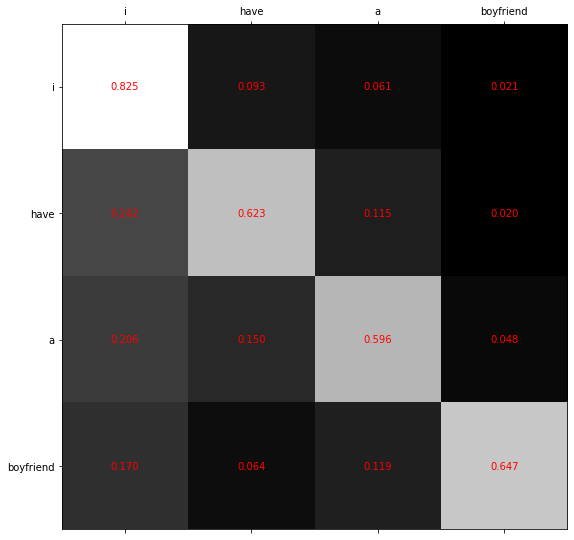

In [ ]:
plot_attention_weights("i have a boyfriend", "i have a boyfriend")

In [ ]:
#boyfriend에 해당하는 어텐션 값
0.170*sen2vec("i") + 0.064*sen2vec("have") + 0.119*sen2vec("a") + 0.647*sen2vec("boyfriend")

array([[ 0.16034535,  0.47957976,  0.03002168, -0.21607726,  0.60416687,
         0.83479433, -0.7356768 ,  0.59505765, -0.50268774,  0.30966365,
        -0.00994146,  0.52705465, -0.81798531,  0.095091  ,  1.15476106,
         0.06518995, -0.27988708,  0.06770148,  0.0971266 , -0.055953  ,
        -0.2617946 ,  1.19704568, -0.05487257,  0.85145882,  0.30843437,
        -1.7731391 , -0.01351534,  0.05490606,  0.55338659, -0.21325899,
         1.79331844, -0.04097162, -0.2160923 ,  0.1190448 ,  0.36594174,
         0.20308263,  0.13083143, -0.02761193,  0.44506859, -0.6116534 ,
         0.24350784,  0.65293461, -0.26075458,  0.15072852,  0.67040178,
        -0.70378953, -0.01286389, -0.92884944,  0.26075242,  0.48927489]])

첫번째 튜플은 소프트맥스 값이고,  

두번째 튜플이 어텐션 값(4,50차원)인데, 차례대로 i, have, a, boyfriend에 해당하는 어텐션 값을 나타냅니다.

In [ ]:
get_attention_output(sen2vec("i have a boyfriend"),sen2vec("i have a boyfriend"),sen2vec("i have a boyfriend"))

(array([[0.82539694, 0.09316572, 0.06088821, 0.02054913],
        [0.24189774, 0.62320525, 0.11484694, 0.02005007],
        [0.20616176, 0.14976789, 0.59562366, 0.04844669],
        [0.17029765, 0.06399637, 0.11857808, 0.6471279 ]]),
 array([[ 0.20148931,  0.1350191 , -0.04919069, -0.62667824,  0.69878051,
         -0.30134875, -0.39557182,  0.41363015, -0.85503068,  0.00940032,
         -0.12359533,  0.68384829, -0.96897992, -0.40569282,  1.19472097,
          0.53073572,  0.12215698,  0.37948309, -0.11376776, -0.69177315,
         -0.66608226,  0.68251418,  0.76935583,  0.24410869,  1.09479813,
         -2.4502045 , -1.16545866,  0.40233508,  0.84878785, -1.01198183,
          3.49924182,  0.65185857, -0.6336274 ,  0.15874573, -0.16779519,
         -0.27276485,  0.4646489 ,  0.63311789,  0.42229858, -0.25748515,
         -0.0596501 ,  0.05494532, -0.23567894,  0.54065008,  0.07713821,
          0.11268194, -0.2033952 , -0.47057798, -0.25308031,  0.72569551],
        [ 0.64684167, -0.

참고로 **트랜스포머나 버트같은 딥러닝 모델에서는 태스크(Seq2Seq, 기계독해 등)**에 맞게 신경망이 훈련되면서, 어텐션 값이 지속적으로 태스크에 맞게 변경됩니다.

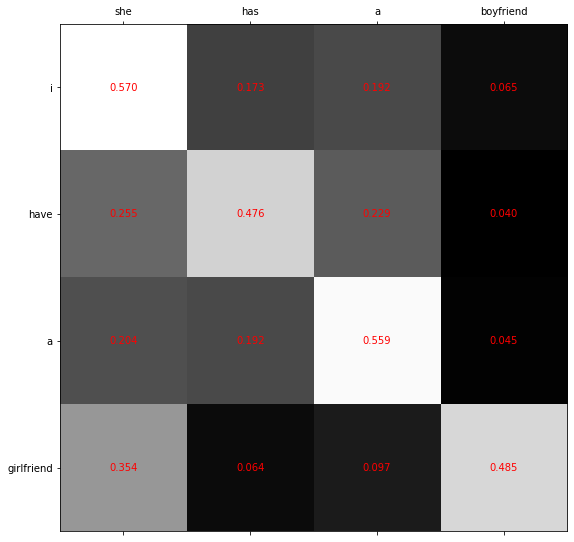

In [ ]:
plot_attention_weights("i have a girlfriend", "she has a boyfriend")

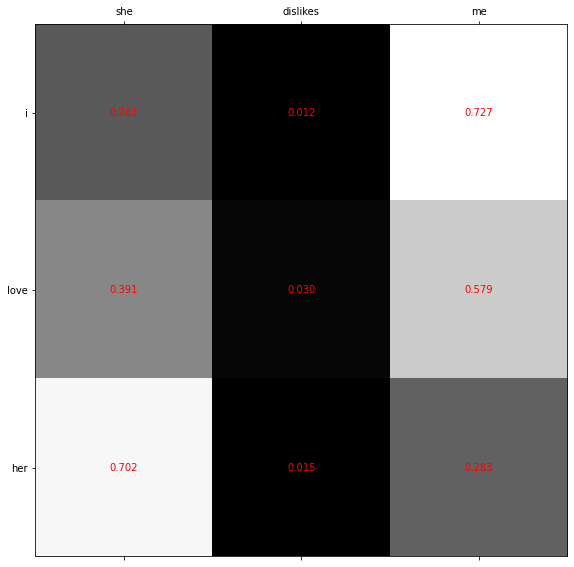

In [ ]:
plot_attention_weights("i love her", "she dislikes me")

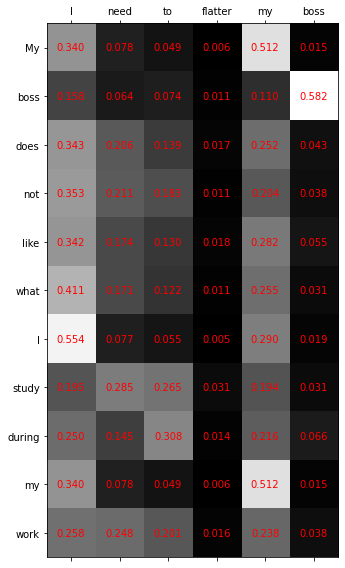

In [ ]:
plot_attention_weights("My boss does not like what I study during my work", "I need to flatter my boss")

### [어텐션을 사용한 인공 신경망 기계 번역](https://www.tensorflow.org/text/tutorials/nmt_with_attention?hl=ko)